In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import klib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


plt.style.use('seaborn')

In [2]:
data=pd.read_csv('processed_data.csv')

In [3]:
data1=data[['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue','PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay']]

In [4]:
from sklearn.cluster import KMeans

In [5]:
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

In [6]:
wcss

[595518.9947542013,
 450712.9440863589,
 386044.332308398,
 337875.69784343627,
 305380.1640160946,
 277377.2449784421,
 261210.10552232226,
 245501.1566784283,
 231139.54166962908]

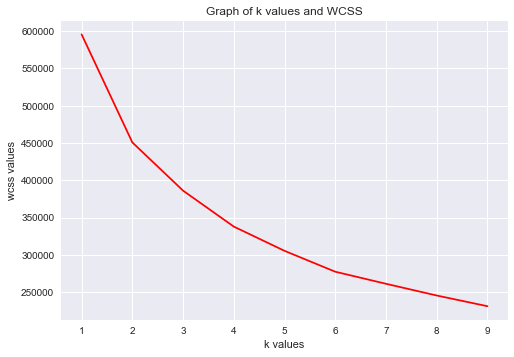

In [7]:
plt.plot(range(1,10), wcss, color='red',marker='x')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [9]:
data

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,...,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1,0.262230,-1.265417,-0.459671,0.023456,0.360185,4,2,-1.261711,1.578742,...,0,0,0,0,0,0,1,0,0,0
1,2,0.262230,1.581582,-0.284167,-0.350951,-0.372046,4,2,1.584588,1.578742,...,0,0,0,1,0,0,1,0,0,0
2,4,0.924758,1.581582,0.066842,-0.515525,-0.274042,4,2,1.584588,1.578742,...,0,0,0,1,0,0,1,0,0,0
3,6,0.483072,1.581582,-0.317074,-0.556669,-0.778064,3,1,1.584588,1.578742,...,0,0,1,0,0,1,0,0,0,0
4,8,-1.136441,1.581582,-0.536454,0.698211,0.201979,4,2,1.584588,1.578742,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63665,83581,0.041387,-1.547764,-0.733896,-0.778844,0.944011,3,1,-1.543988,-1.548269,...,0,0,1,0,0,0,1,0,0,0
63666,83583,0.115001,-1.547764,0.044904,-0.914618,-1.030075,2,0,-1.543988,-1.548269,...,0,0,1,0,0,0,1,0,0,0
63667,83585,0.335844,-1.547764,0.319129,-0.116844,0.362986,4,2,-1.543988,-1.548269,...,0,0,1,0,0,0,1,0,0,0
63668,83587,-0.032227,-1.547764,0.242346,-0.157165,2.666086,4,2,-1.543988,-1.548269,...,0,0,1,0,0,0,1,0,0,0


In [10]:
from sklearn.metrics import silhouette_score

In [11]:
sc=[]

In [12]:
kmeans=KMeans(n_clusters=2).fit(data1)
score=silhouette_score(data1,kmeans.labels_)
sc.append(score)

In [13]:
kmeans=KMeans(n_clusters=3).fit(data1)
score=silhouette_score(data1,kmeans.labels_)
sc.append(score)

In [14]:
kmeans=KMeans(n_clusters=4).fit(data1)
score=silhouette_score(data1,kmeans.labels_)
sc.append(score)

In [15]:
kmeans=KMeans(n_clusters=5).fit(data1)
score=silhouette_score(data1,kmeans.labels_)
sc.append(score)

In [16]:
kmeans=KMeans(n_clusters=6).fit(data1)
score=silhouette_score(data1,kmeans.labels_)
sc.append(score)

Text(0, 0.5, 'Silhouette Coefficient')

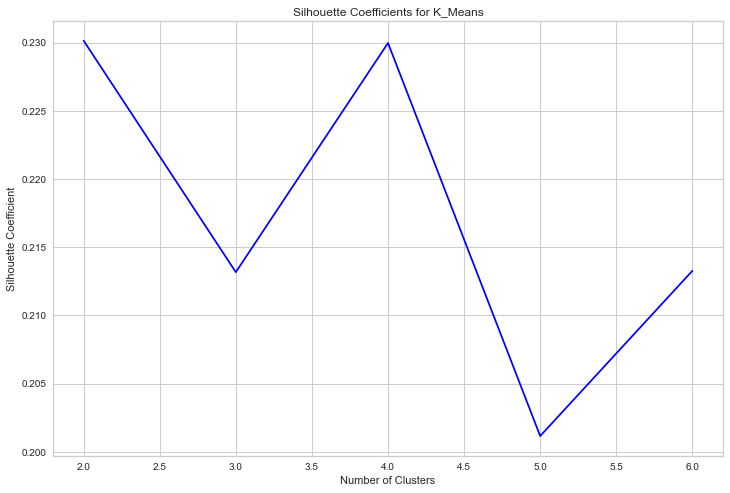

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(range(2, 7), sc, color='blue')

ax.set_title('Silhouette Coefficients for K_Means')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Coefficient')

In [19]:
unscaled_data=pd.read_csv('Unscaled_data.csv')

In [20]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

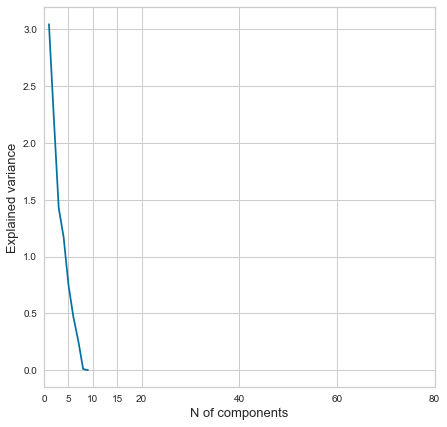

In [21]:
pca = PCA()
pca.fit(data1)


explained_variance = pca.explained_variance_

# Plot explained variance
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(1,10,1), explained_variance)
plt.xlabel('N of components', fontsize=13)
plt.ylabel('Explained variance', fontsize=13)
plt.xticks([0,5,10,15,20,40,60,80])
plt.show()

[0.32565151 0.56305943 0.71562145 0.84093532 0.92109029 0.97119055
 0.99891343 0.99996558 1.        ]


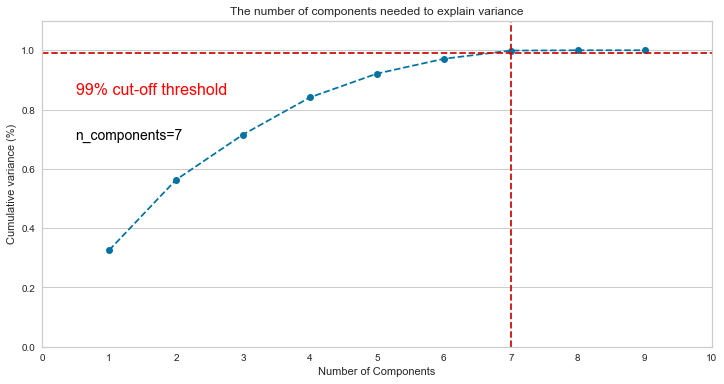

In [22]:
pca = PCA().fit(data1)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
print(y)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='--')
plt.axvline(x=7, color='r', linestyle='--')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)
plt.text(0.5, 0.70, 'n_components=7', color = 'black', fontsize=14)
ax.grid(axis='x')
plt.show()

In [23]:
pca = PCA(n_components=7)
x_7cols = pca.fit_transform(data1)

In [24]:
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_7cols)
    wcss.append(kmeans.inertia_)

In [25]:
wcss

[594871.9215496413,
 450064.87783671013,
 385398.5869916901,
 337227.86423533235,
 304734.4002134557,
 276731.1772376005,
 260563.30870452343,
 244854.65080163477,
 230494.20258237072]

In [26]:
x_7cols.shape

(63670, 7)

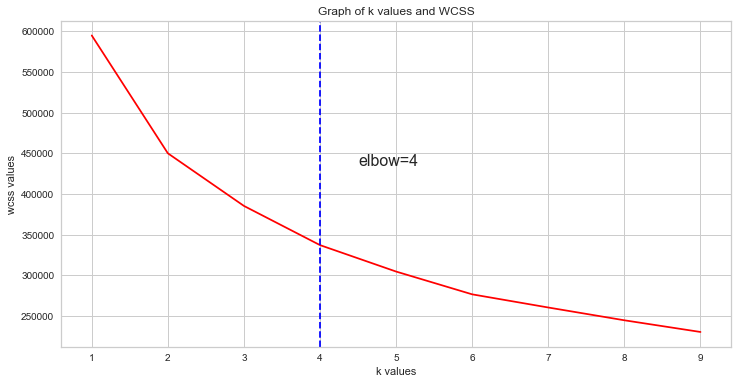

In [27]:
fig,ax = plt.subplots()
ax.plot(range(1,10), wcss, color='red',marker='x')
plt.axvline(x=4,color='blue',linestyle='--')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
ax.annotate('elbow=4',xy=(4.2,450000),xytext=(4.5,450000),
                horizontalalignment='left',
                verticalalignment='top',size=16)

plt.show()

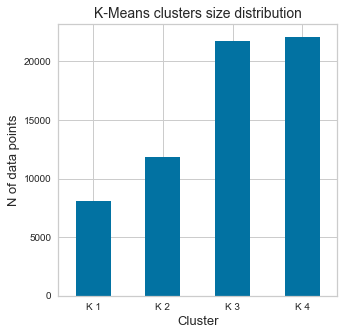

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(x_7cols)
labels_km = kmeans.predict(x_7cols)

# Creates dataframe with the labels
kmeans_df = pd.DataFrame(labels_km, columns=['cluster_id'])

# Create plot
fig = plt.figure(figsize=(5, 5))
kmeans_df.value_counts().sort_index().plot.bar()
plt.xlabel('Cluster', fontsize=13)
plt.title('K-Means clusters size distribution', fontsize=14)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=[0,1,2,3], labels=['K 1','K 2','K 3','K 4'], rotation=0)
plt.show()

In [29]:
unscaled_data=pd.read_csv('Unscaled_data.csv')

In [30]:
df = unscaled_data.copy(deep=True)
df['label'] = labels_km

In [31]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,month,year,Day,label
0,1,PRT,51.0,150,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,0,0,...,0,0,0,0,0,0,8,2018,Thursday,2
1,2,PRT,51.0,997,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,12,2015,Sunday,3
2,4,FRA,60.0,997,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,12,2015,Sunday,3
3,6,JPN,54.0,997,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,...,0,0,0,0,0,0,12,2015,Wednesday,3
4,8,FRA,32.0,997,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,0,...,1,0,0,0,0,0,12,2015,Sunday,3


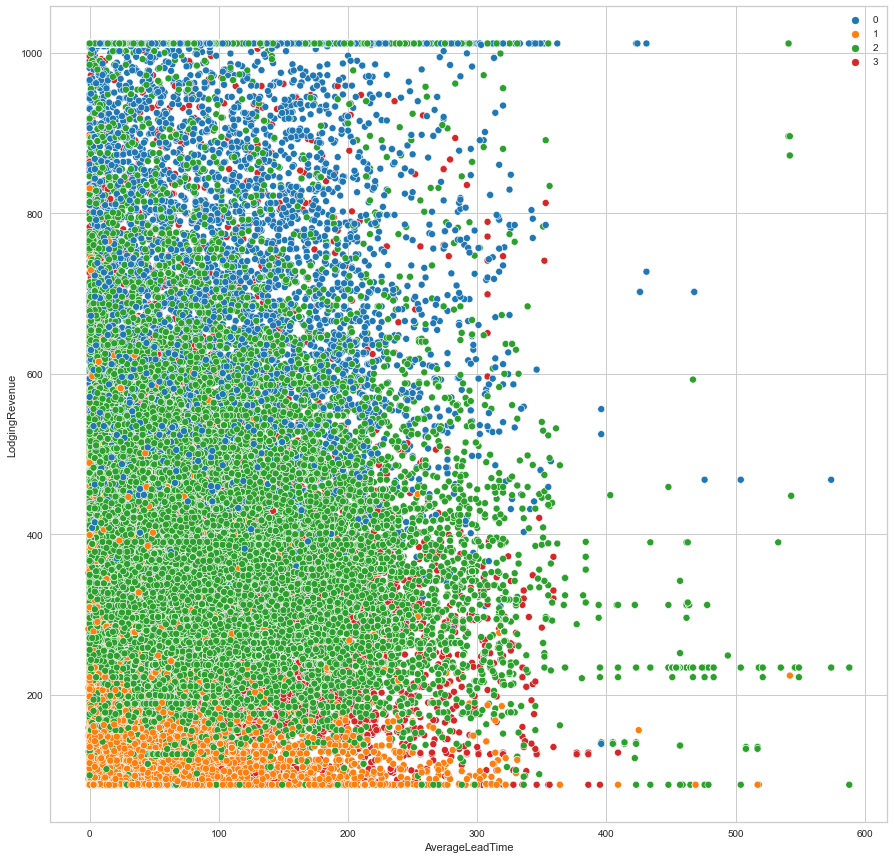

In [32]:
plt_1=plt.figure(figsize=(15,15))
sns.scatterplot(df['AverageLeadTime'],df['LodgingRevenue'],hue=df['label'],palette="tab10")
plt.legend()
plt.show()

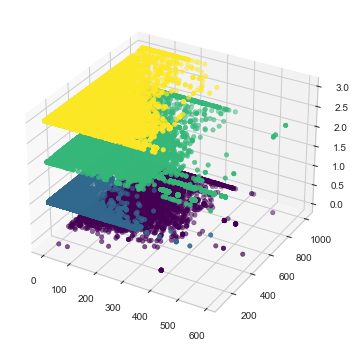

In [33]:
ax = plt.axes(projection='3d')
ax.scatter(df['AverageLeadTime'],df['LodgingRevenue'],df['label'],c=df['label'], cmap='viridis', linewidth=0.5);

In [34]:
df.to_csv(r'D:\Study Material\Sem 6\DMWA Project\Hotel Customer Segmentation\Unscaled_data_Kmeans.csv', index = False, header=True)

<Figure size 1080x3960 with 0 Axes>

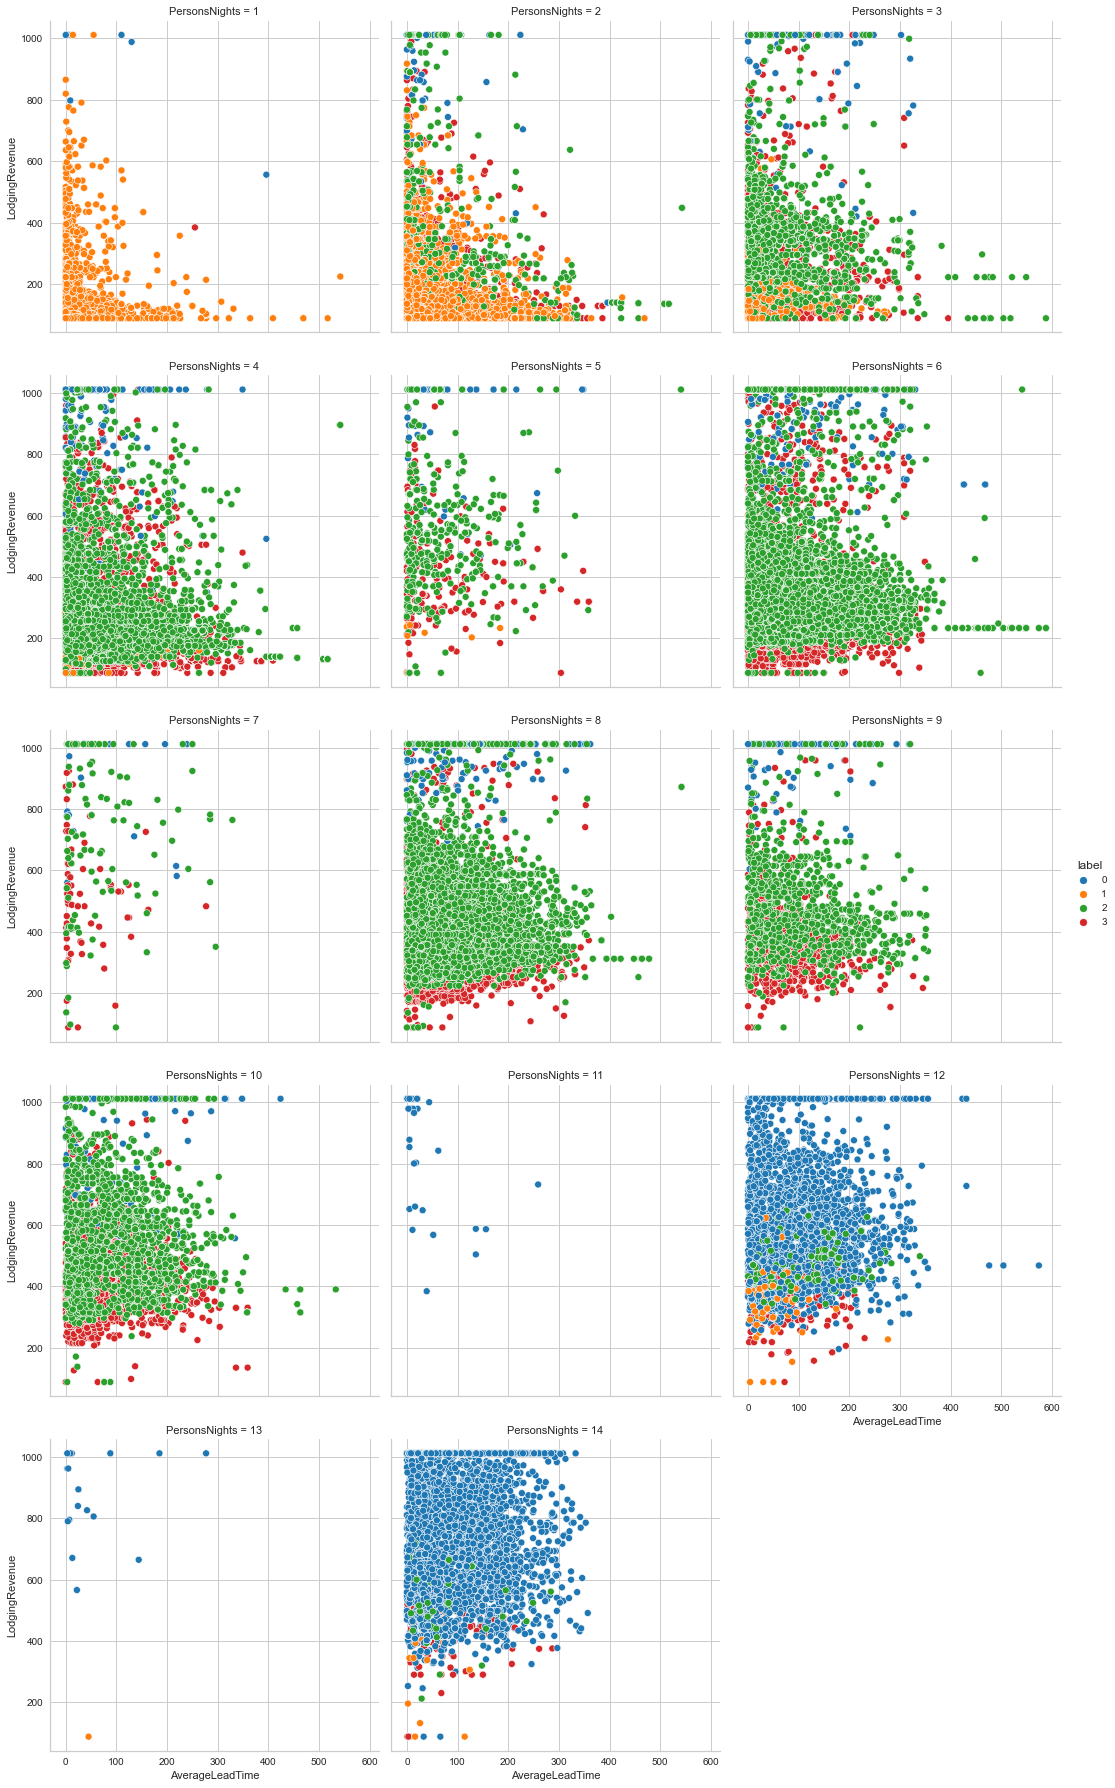

In [35]:
plt_1=plt.figure(figsize=(15,55))
sns.relplot(df['AverageLeadTime'],df['LodgingRevenue'],hue=df['label'],
            col=df['PersonsNights'],palette="tab10",col_wrap=3)

plt.show()

In [36]:
from sklearn import metrics

In [37]:
#Performance Metric
metrics.silhouette_score(data1, labels_km, metric='euclidean')

0.22984897613848704

In [38]:
data2= pd.read_csv('processed_file.csv')

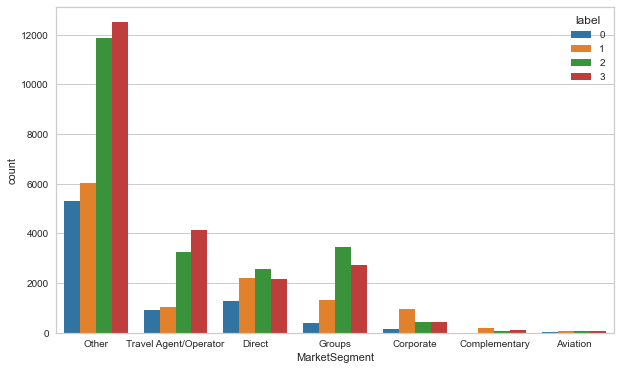

In [39]:
plt.subplots(figsize = (10,6))
sns.countplot(x=data2['MarketSegment'],order=data2['MarketSegment'].value_counts().index,hue=df['label'],palette="tab10")
plt.show()

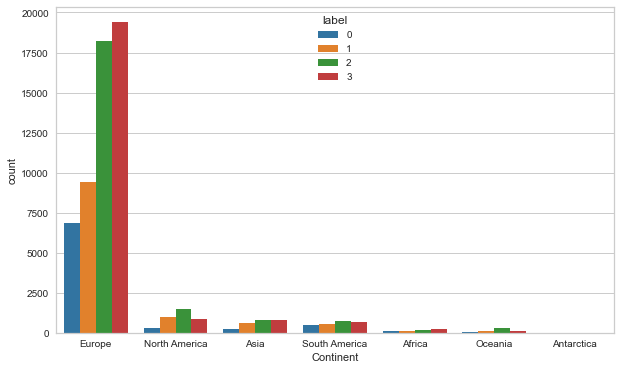

In [40]:
plt.subplots(figsize = (10,6))
sns.countplot(x=data2['Continent'],order=data2['Continent'].value_counts().index,hue=df['label'],palette="tab10")
plt.show()

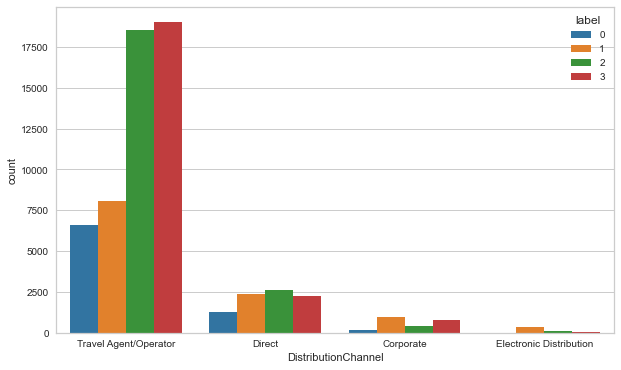

In [41]:
plt.subplots(figsize = (10,6))
sns.countplot(x=data2['DistributionChannel'],order=data2['DistributionChannel'].value_counts().index,hue=df['label'],palette="tab10")
plt.show()

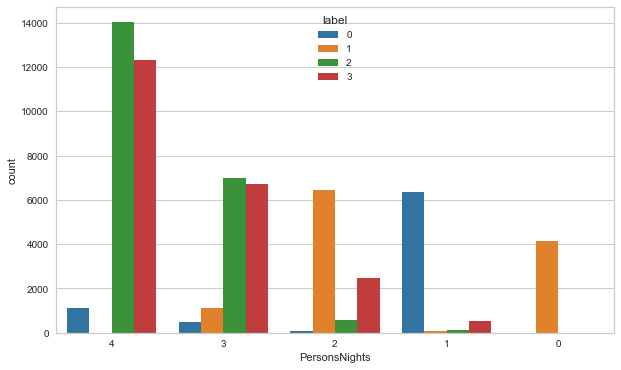

In [42]:
plt.subplots(figsize = (10,6))
sns.countplot(x=data2['PersonsNights'],order=data2['PersonsNights'].value_counts().index,hue=df['label'],palette="tab10")
plt.show()

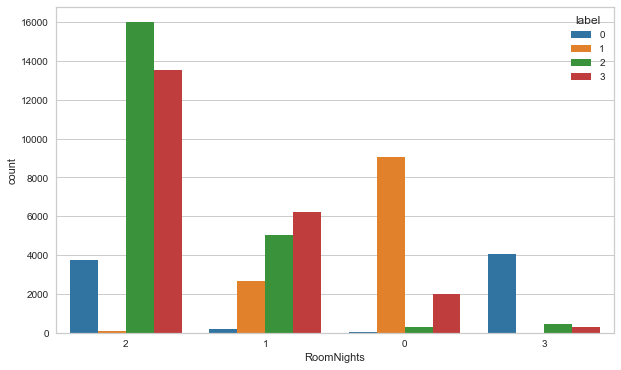

In [43]:
plt.subplots(figsize = (10,6))
sns.countplot(x=data2['RoomNights'],order=data2['RoomNights'].value_counts().index,hue=df['label'],palette="tab10")
plt.show()

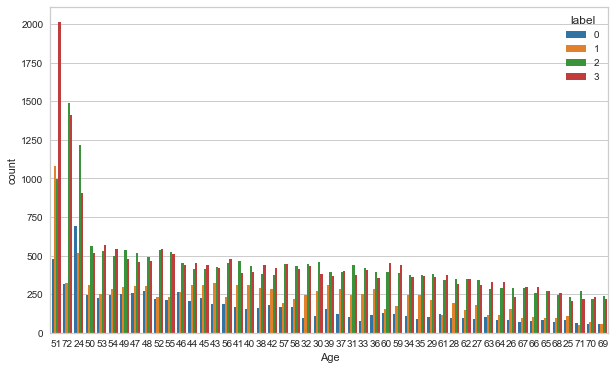

In [44]:
plt.subplots(figsize = (10,6))
sns.countplot(x=data2['Age'],order=data2['Age'].value_counts().index,hue=df['label'],palette="tab10")
plt.show()